In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


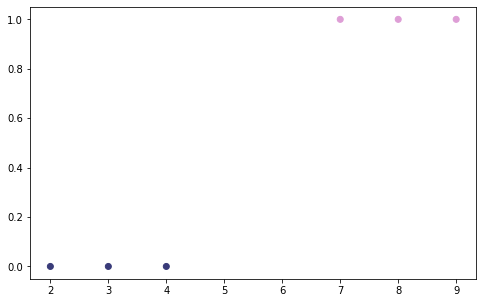

In [35]:
x = np.array([2, 3, 4, 7, 8, 9]).reshape(-1, 1)
y = np.array([0, 0, 0, 1, 1, 1])

figsize(8, 5)
plt.scatter(x, y, c=y, cmap='tab20b')

In [49]:
# Creating a perceptron with one weight and one bias to classify data 
w = np.random.uniform(size=(1)) * 0.1
b = np.random.uniform(size=(1)) * 0.1
lr = 1e-2
th = 0.5

losses, accuracies = [], []

In [51]:

# do do note that we are running on all of the date each epoc

epoc =  30
for i in range(epoc): 

  err = y - (x.dot(w)+b)

  # the multiplication by -2 is just for clarity of the equasions 
  # there is absolutly no reason to include them beyond that.
  dw = -2 * (x.T * err).mean()
  db = -2 * err.mean()

  # update the weight and bias 
  w -= dw*lr
  b -= db*lr

  # calc loss and accuracy for this run
  mse = ((y - (x.dot(w)+b)) ** 2).mean()
  acc = ((x.dot(w)+b > th) == y).mean()

  losses.append(mse)
  accuracies.append(acc)


acc = ((x.dot(w)+b > th) == y).mean()
mse = ((y - (x.dot(w)+b)) ** 2).mean()
print(f'mse: {mse:.4f}, accuracy: {acc:.2f}')

mse: 0.0640, accuracy: 1.00


In [52]:
w, b # we would like the weight and bias to be small 

(array([0.11185468]), array([-0.03087377]))

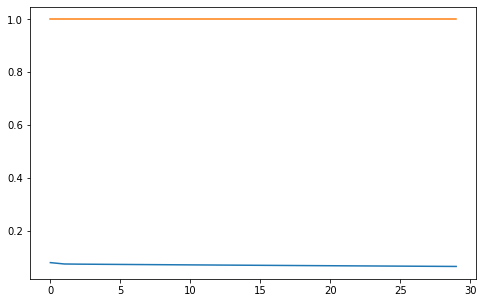

In [53]:
plt.plot(losses)
plt.plot(accuracies)

In [54]:
w, b 

(array([0.11185468]), array([-0.03087377]))

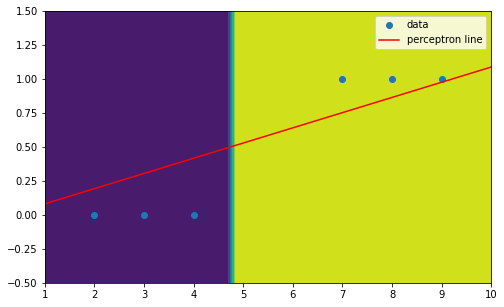

In [55]:
xs = np.linspace(x.min() -1, x.max() + 1, 50)
ys = np.linspace(y.min() - 0.5, y.max() + 0.5, 50)
X, Y = np.meshgrid(xs, ys)

predictions = xs[:, np.newaxis].dot(w)+b

z = np.concatenate([predictions > th]*50).reshape(50, 50)
plt.contourf(X, Y, z)

plt.scatter(x, y, label='data')
plt.plot(xs, predictions, c='r', label='perceptron line')
plt.legend()

In [147]:
# let's add a sigmoid activation layer (adding a non-linearity)

def sigmoid(x): return 1/(1+np.exp(-x))

w = np.random.uniform(size=(1)) * 0.1
b = np.random.uniform(size=(1)) * 0.1

lr = 3e-1
th = 0.5


In [80]:
x, w, b

(array([[2],
        [3],
        [4],
        [7],
        [8],
        [9]]),
 array([0.0599643]),
 array([0.01032256]))

In [58]:
def predict(x, w , b): return sigmoid(x.dot(w)+b)

y_hat = predict(x, w ,b) # if we see numbers close to 0.5 this is good because we will get good gradients
y_hat

array([0.52996405, 0.53245431, 0.53494295, 0.54239794, 0.54487889,
       0.54735762])

In [59]:
# calc gradients
err = y - y_hat

dw = -2 * (x.T * err * y_hat * (1-y_hat)).mean()
db = -2 * (err * y_hat * (1-y_hat)).mean()

print(f'dw: {dw}\ndb: {db}')

dw: -0.5044148175567347
db: 0.01968784149372725


In [60]:
# update w, b
w -= dw * lr
b -= db * lr
w, b 

(array([0.16132445]), 0.09409364755188183)

In [61]:
y_hat = predict(x, w, b)
mse = ((y - y_hat)**2).mean()
acc = ((y_hat > 0.5) == y).mean()
mse, acc

(0.22573963977366562, 0.5)

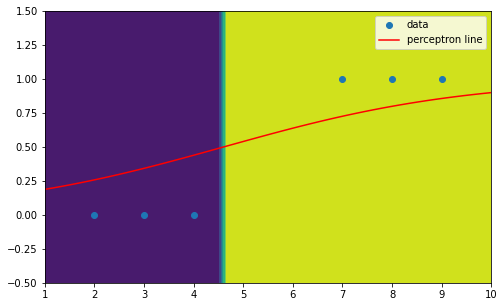

In [153]:
xs = np.linspace(x.min() -1, x.max() + 1, 50)
ys = np.linspace(y.min() - 0.5, y.max() + 0.5, 50)
X, Y = np.meshgrid(xs, ys)

predictions = predict(xs[:, np.newaxis], w, b)

z = np.concatenate([predictions > th]*50).reshape(50, 50)
plt.contourf(X, Y, z)

plt.scatter(x, y, label='data')
plt.plot(xs, predictions, c='r', label='perceptron line')
plt.legend()

In [140]:

y_hat = predict(x, w, b)
mse = ((y - y_hat)**2).mean()
mse, lr

(0.2241143806080479, 0.3)

In [148]:
lr = 0.5

In [151]:
losses = []
accuracies = []

for i in range(30):
  y_hat = predict(x, w, b)
  err = y-y_hat
  dw = -2 * (x.T * err * y_hat * (1-y_hat)).mean()
  db = -2 * (err * y_hat * (1-y_hat)).mean()
  w -= dw * lr
  b -= db * lr

  acc = ((y_hat > th) == y).mean()
  mse = ((y - y_hat)**2).mean()

  losses.append(mse)
  accuracies.append(acc)

y_hat = predict(x, w, b)
acc = ((y_hat > th) == y).mean()
mse = ((y - y_hat)**2).mean()
print(f'mse: {mse:.4f}, accuracy: {acc:.2f}')

mse: 0.0854, accuracy: 1.00


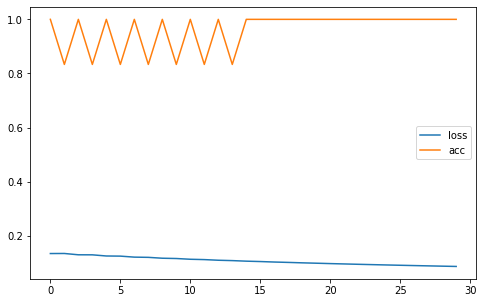

In [152]:
plt.plot(losses, label='loss')
plt.plot(accuracies, label='acc')
plt.legend()

In [30]:
# One more example, now with more features. 

# data
x = np.array([
  [1,1], 
  [1,2],
  [2,1],
  [2,2],
  [3,3],
  [1,4],
  [4,1],
  [4,4]
]).astype('float32')

# lables
y = np.array([0,0,0,0,1,1,1,1]).astype('float32')

color = {1:'r', 0:'b'}


array([0.52774226, 0.53882911, 0.52957271, 0.54065399, 0.55351137,
       0.56087727, 0.53323117, 0.56629756])

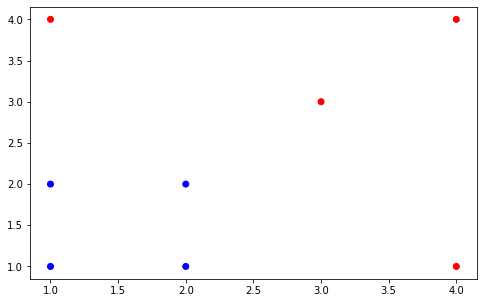

In [31]:
plt.scatter(x[:, 0], x[:, 1], c = [color[c] for c in y])

w = np.random.uniform(size = x.shape[1])*0.1
b = np.random.uniform(size=1)*0.1
w,b

predict(x, w, b) # test whether w, b have a good starting point


0.3


In [32]:
def predict(x, w, b): return sigmoid(np.dot(x, w)+b)

for i in range(100):
  y_hat = predict(x, w, b)
  err = y-y_hat
  dw = -2 * (x.T * err * y_hat * (1-y_hat)).mean()
  db = -2 * (err * y_hat * (1-y_hat)).mean()
  w -= dw * lr
  b -= db * lr

prediction = predict(x, w, b)
acc = ((prediction > th) == y).mean()
mse = ((y - prediction)**2).mean()
print(f'mse: {mse:.4f}, accuracy: {acc:.2f}')

mse: 0.1426, accuracy: 0.88


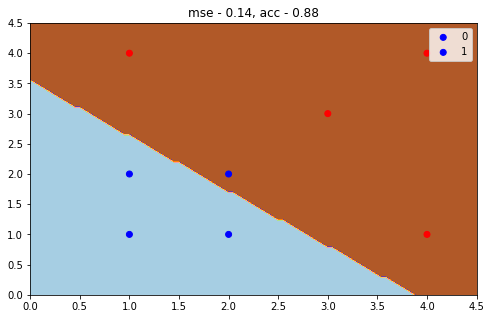

In [33]:
xs = np.linspace(0, 4.5, 100)
ys = np.linspace(0, 4.5, 100)
X, Y = np.meshgrid(xs, ys)

r1, r2 = X.flatten(), Y.flatten()
grid = np.hstack((r1, r2))
grid = grid.reshape(2, 100*100).T

pline = sigmoid(grid.dot(w.T)+b)
plt.contourf(X, Y, pline.reshape(100, 100).round(), cmap='Paired')
# plt.colorbar(cmap='Paired')

prediction = predict(x, w, b)
rp = prediction.round()

# plt.scatter(rp[rp == 1], y[rp == 1], cmap='Paired')
plt.scatter(x[rp == 0][:, 0], x[rp == 0][:, 1], c = [color[c] for c in y[rp == 0]], cmap='Paired', label='0')
plt.scatter(x[rp == 1][:, 0], x[rp == 1][:, 1], c = [color[c] for c in y[rp == 1]], cmap='Paired', label='1')

acc = ((prediction > th) == y).mean()
mse = ((y - prediction) ** 2).mean()

plt.title(f'mse - {mse:.2f}, acc - {acc:.2f}')
plt.legend()